# Multiple Linear Regression
## Bike Case Study

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Data Dictionary

Dataset characteristics:

<br>
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- ** season : season (1:spring, 2:summer, 3:fall, 4:winter) **
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ **weathersit** : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	
=========================================
License
=========================================
Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}

=========================================
Contact
=========================================
	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the rental dataset

In [528]:
# Supress Warnings

import warnings
warnings.filterwarnings('always')

In [529]:
import numpy as np
import pandas as pd

In [530]:
rental = pd.read_csv("day.csv")

In [531]:
# Check the head of the dataset
rental.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

Inspect the various aspects of the rental dataframe

In [532]:
rental.shape

(730, 16)

In [533]:
rental.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [534]:
rental.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 2: Converting Season, Weatherisit, etc to Categorical Strings


In [535]:
# Convert season
rental['season']= rental['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [536]:
# Convert weatherisit
rental['weathersit'] = rental['weathersit'].map({1:'clear',2:'mist',3:'snow',4:'storm'})

In [537]:
# Convert month
rental['mnth'] = rental['mnth'].map({1:'Jan',2:'Feb',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',
                                    10:'October',11:'November',12:'December'})

In [538]:
# Convert day of week
rental['weekday'] = rental['weekday'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'})

In [539]:
# See the update head
rental.head()

instant      dteday  season  yr mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0     Sunday           0   
1        2  02-01-2018  spring   0  Jan        0     Monday           0   
2        3  03-01-2018  spring   0  Jan        0    Tuesday           1   
3        4  04-01-2018  spring   0  Jan        0  Wednesday           1   
4        5  05-01-2018  spring   0  Jan        0   Thursday           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

## Step 3: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [540]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

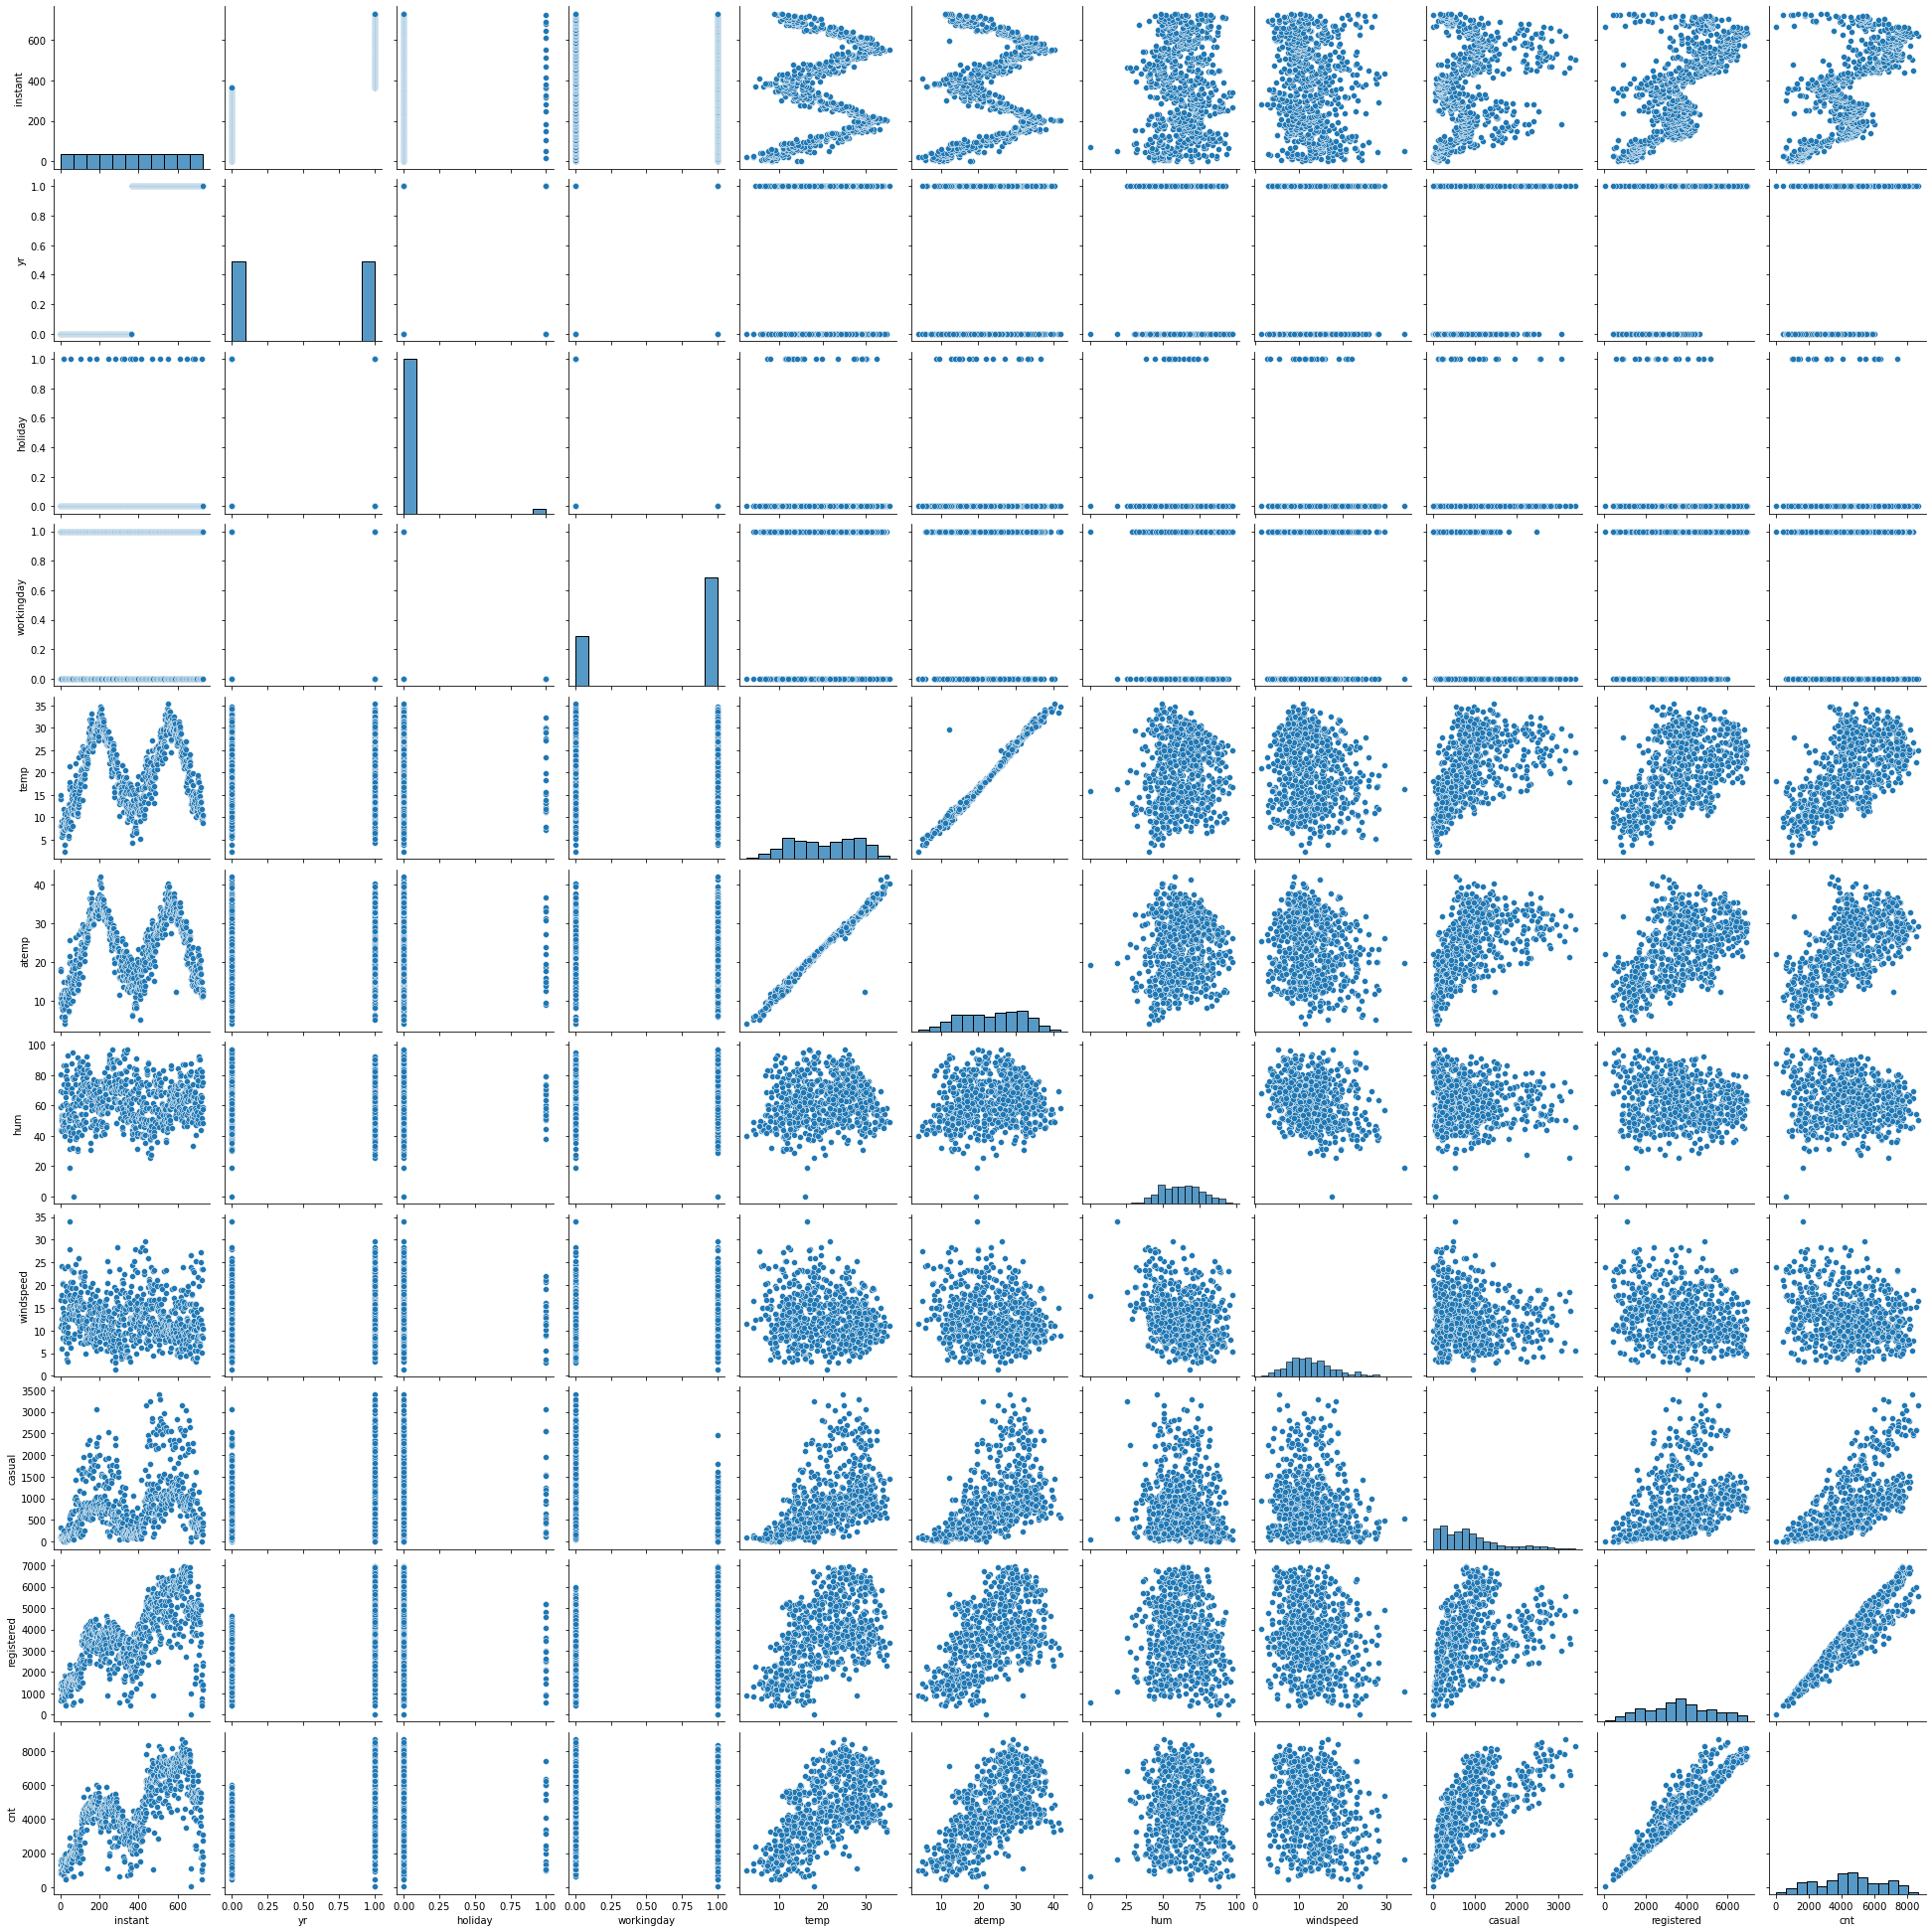

In [541]:
sns.pairplot(rental)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

In [558]:
rental.head()

instant      dteday  season  yr mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0     Sunday           0   
1        2  02-01-2018  spring   0  Jan        0     Monday           0   
2        3  03-01-2018  spring   0  Jan        0    Tuesday           1   
3        4  04-01-2018  spring   0  Jan        0  Wednesday           1   
4        5  05-01-2018  spring   0  Jan        0   Thursday           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

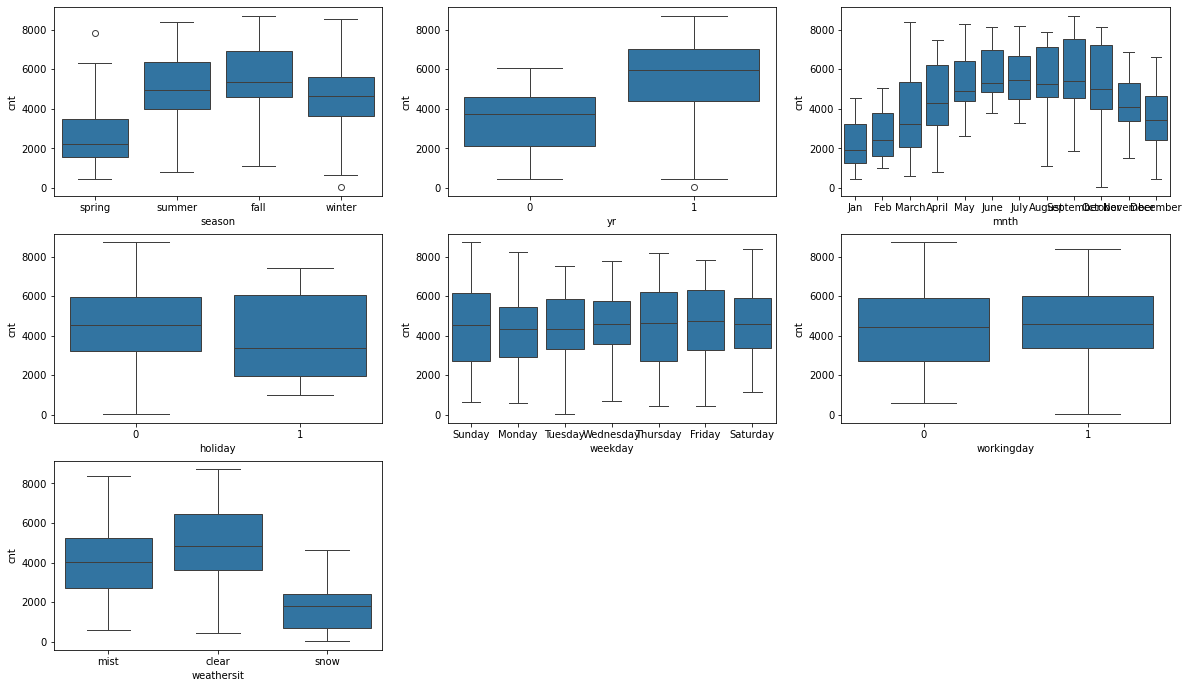

In [561]:
plt.figure(figsize=(20, 16))
plt.subplot(4,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = rental)
plt.subplot(4,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = rental)
plt.subplot(4,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = rental)
plt.subplot(4,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = rental)
plt.subplot(4,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = rental)
plt.subplot(4,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = rental)
plt.subplot(4,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = rental)
plt.show()

 Note: **There are only 3 types available for weather in the dataset, there is not entry for storm.**

#### Observations: Month and Season Correlation 
We can clearly see that month and season data are highly correlated and therefore, we can use season rather than month for our model in the next steps.

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `season` with `workingday` as the hue.

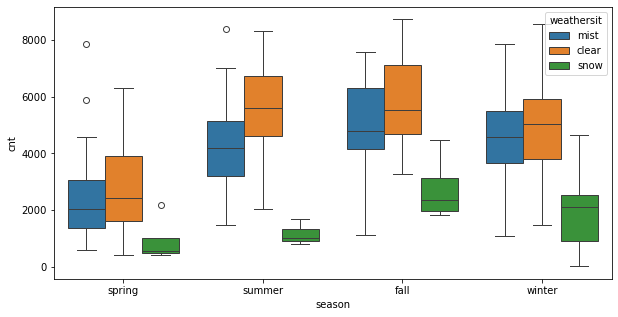

In [389]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'season', y = 'cnt', hue = 'weathersit', data = rental)
plt.show()

## Step 4: Data Preparation

In [390]:
rental.head()

instant      dteday  season  yr mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0     Sunday           0   
1        2  02-01-2018  spring   0  Jan        0     Monday           0   
2        3  03-01-2018  spring   0  Jan        0    Tuesday           1   
3        4  04-01-2018  spring   0  Jan        0  Wednesday           1   
4        5  05-01-2018  spring   0  Jan        0   Thursday           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

- All the boolean Yes/No variables are already mapped to 1 and 0 respectively, so there is no need to map them again.
- But we need to create dummy variables for the categorical variables we have added, ie. season and weathersit

### Dummy Variables

The variable `season` and `weathersit` has 4 levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

In [391]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'seasons'
seasons = pd.get_dummies(rental['season'])

In [392]:
# Check what the dataset 'seasons' looks like
seasons.head()

fall  spring  summer  winter
0  False    True   False   False
1  False    True   False   False
2  False    True   False   False
3  False    True   False   False
4  False    True   False   False

We can drop the first col and infer that using the other 3

In [393]:
# Let's drop the first column from status df using 'drop_first = True'. Conver this to int so that we can use it in our model.
seasons = pd.get_dummies(rental['season'], drop_first = True)
seasons = seasons.astype(int)

In [394]:
# Add the results to the original rental dataframe
rental = pd.concat([rental, seasons], axis = 1)

In [395]:
# Now let's see the head of our dataframe.

rental.head()

instant      dteday  season  yr mnth  holiday    weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0     Sunday           0   
1        2  02-01-2018  spring   0  Jan        0     Monday           0   
2        3  03-01-2018  spring   0  Jan        0    Tuesday           1   
3        4  04-01-2018  spring   0  Jan        0  Wednesday           1   
4        5  05-01-2018  spring   0  Jan        0   Thursday           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  spring  summer  winter  
0   985       1       0       0  
1   801       1       0       0  
2  1349       1       0       0  
3  1562       1       0       0  
4  1600       1       0       0

In [396]:
# Drop 'season' as we have created the dummies for it

rental.drop(['season'], axis = 1, inplace = True)

In [397]:
rental.head()

instant      dteday  yr mnth  holiday    weekday  workingday weathersit  \
0        1  01-01-2018   0  Jan        0     Sunday           0       mist   
1        2  02-01-2018   0  Jan        0     Monday           0       mist   
2        3  03-01-2018   0  Jan        0    Tuesday           1      clear   
3        4  04-01-2018   0  Jan        0  Wednesday           1      clear   
4        5  05-01-2018   0  Jan        0   Thursday           1      clear   

        temp     atemp      hum  windspeed  casual  registered   cnt  spring  \
0  14.110847  18.18125  80.5833  10.749882     331         654   985       1   
1  14.902598  17.68695  69.6087  16.652113     131         670   801       1   
2   8.050924   9.47025  43.7273  16.636703     120        1229  1349       1   
3   8.200000  10.60610  59.0435  10.739832     108        1454  1562       1   
4   9.305237  11.46350  43.6957  12.522300      82        1518  1600       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0

In [398]:
# Now, we will do the same for the other weather as well
weather = pd.get_dummies(rental['weathersit'], drop_first = True)
weather = weather.astype(int)
rental = pd.concat([rental, weather], axis = 1)
rental.drop(['weathersit'], axis = 1, inplace = True)

In [399]:
rental.head()

instant      dteday  yr mnth  holiday    weekday  workingday       temp  \
0        1  01-01-2018   0  Jan        0     Sunday           0  14.110847   
1        2  02-01-2018   0  Jan        0     Monday           0  14.902598   
2        3  03-01-2018   0  Jan        0    Tuesday           1   8.050924   
3        4  04-01-2018   0  Jan        0  Wednesday           1   8.200000   
4        5  05-01-2018   0  Jan        0   Thursday           1   9.305237   

      atemp      hum  windspeed  casual  registered   cnt  spring  summer  \
0  18.18125  80.5833  10.749882     331         654   985       1       0   
1  17.68695  69.6087  16.652113     131         670   801       1       0   
2   9.47025  43.7273  16.636703     120        1229  1349       1       0   
3  10.60610  59.0435  10.739832     108        1454  1562       1       0   
4  11.46350  43.6957  12.522300      82        1518  1600       1       0   

   winter  mist  snow  
0       0     1     0  
1       0     1     0  
2       0     0     0  
3       0     0     0  
4       0     0     0

In [400]:
# Create dummy variables for day of week
weekday = pd.get_dummies(rental['weekday'], drop_first = True)
weekday = weekday.astype(int)
rental = pd.concat([rental, weekday], axis = 1)
rental.drop(['weekday'], axis = 1, inplace = True)

In [401]:
rental.head()

instant      dteday  yr mnth  holiday  workingday       temp     atemp  \
0        1  01-01-2018   0  Jan        0           0  14.110847  18.18125   
1        2  02-01-2018   0  Jan        0           0  14.902598  17.68695   
2        3  03-01-2018   0  Jan        0           1   8.050924   9.47025   
3        4  04-01-2018   0  Jan        0           1   8.200000  10.60610   
4        5  05-01-2018   0  Jan        0           1   9.305237  11.46350   

       hum  windspeed  ...  summer  winter  mist  snow  Monday  Saturday  \
0  80.5833  10.749882  ...       0       0     1     0       0         0   
1  69.6087  16.652113  ...       0       0     1     0       1         0   
2  43.7273  16.636703  ...       0       0     0     0       0         0   
3  59.0435  10.739832  ...       0       0     0     0       0         0   
4  43.6957  12.522300  ...       0       0     0     0       0         0   

   Sunday  Thursday  Tuesday  Wednesday  
0       1         0        0          0  
1       0         0        0          0  
2       0         0        1          0  
3       0         0        0          1  
4       0         1        0          0  

[5 rows x 24 columns]

# Note:

Here is the inference after removing 1 level from each
, but in the dataset, we only have 3 for weathersit, so here will be the inference:

- spring:0, summer:0, winter:0 -> fall
- mist:0, snow:0 -> clear(Because there was no row containing the weather storm in the datset, hence its out of question)
- If all the days are 0, it means its Friday


# Dropping Columns

We can observe from the dataset and the plots that there are 3 variables which can be dropped:
- instant: Its just the id and it has no use for Linear Regression.
- dteday: Derived metrics like mnth and yr are already present in the dataset so there is no need include the complete date.
- mnth: This information is already captured by seasons and we can easily prevent creating 11 new dummy variables for each month.
- casual and registered: This is a breakdown of the target variable and hence its not an input to our regression model.

In [402]:
rental.columns

Index(['instant', 'dteday', 'yr', 'mnth', 'holiday', 'workingday', 'temp',
       'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt', 'spring',
       'summer', 'winter', 'mist', 'snow', 'Monday', 'Saturday', 'Sunday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [403]:
# Drop the 3 cols
rental = rental.drop(columns=['instant','dteday','mnth','casual','registered'])

In [404]:
rental.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'mist', 'snow', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Step 5: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [405]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(rental, train_size = 0.7, test_size = 0.3, random_state = 100)

### Min Max Scaling of the Features 

In [406]:
from sklearn.preprocessing import MinMaxScaler

In [407]:
scaler = MinMaxScaler()

In [408]:
df_train.head(3)

yr  holiday  workingday       temp    atemp      hum  windspeed   cnt  \
653   1        0           1  19.201653  23.0423  55.8333  12.208807  7534   
576   1        0           1  29.246653  33.1448  70.4167  11.083475  7216   
426   1        0           0  16.980847  20.6746  62.1250  10.792293  4066   

     spring  summer  winter  mist  snow  Monday  Saturday  Sunday  Thursday  \
653       0       0       1     0     0       0         0       0         0   
576       0       0       0     0     0       0         0       0         0   
426       1       0       0     1     0       0         0       1         0   

     Tuesday  Wednesday  
653        0          1  
576        0          1  
426        0          0

In [409]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [410]:
df_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794   
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           0  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   

          cnt  spring  summer  winter  mist  snow  Monday  Saturday  Sunday  \
653  0.864243       0       0       1     0     0       0         0       0   
576  0.827658       0       0       0     0     0       0         0       0   
426  0.465255       1       0       0     1     0       0         0       1   
728  0.204096       1       0       0     0     0       1         0       0   
482  0.482973       0       1       0     1     0       0         0       1   

     Thursday  Tuesday  Wednesday  
653         0        0          1  
576         0        0          1  
426         0        0          0  
728         0        0          0  
482         0        0          0

In [411]:
df_train.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.676471    0.537262    0.512989    0.650369   
std      0.500429    0.157763    0.468282    0.225844    0.212385    0.145882   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.332086    0.538643   
50%      1.000000    0.000000    1.000000    0.540519    0.526811    0.653714   
75%      1.000000    0.000000    1.000000    0.735215    0.688457    0.754830   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        windspeed         cnt      spring      summer     winter        mist  \
count  510.000000  510.000000  510.000000  510.000000  510.00000  510.000000   
mean     0.320768    0.513620    0.243137    0.245098    0.24902    0.343137   
std      0.169797    0.224593    0.429398    0.430568    0.43287    0.475223   
min      0.000000    0.000000    0.000000    0.000000    0.00000    0.000000   
25%      0.199179    0.356420    0.000000    0.000000    0.00000    0.000000   
50%      0.296763    0.518638    0.000000    0.000000    0.00000    0.000000   
75%      0.414447    0.684710    0.000000    0.000000    0.00000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.00000    1.000000   

             snow      Monday    Saturday      Sunday    Thursday     Tuesday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.029412    0.143137    0.127451    0.154902    0.158824    0.150980   
std      0.169124    0.350557    0.333805    0.362166    0.365870    0.358381   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Wednesday  
count  510.000000  
mean     0.131373  
std      0.338139  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

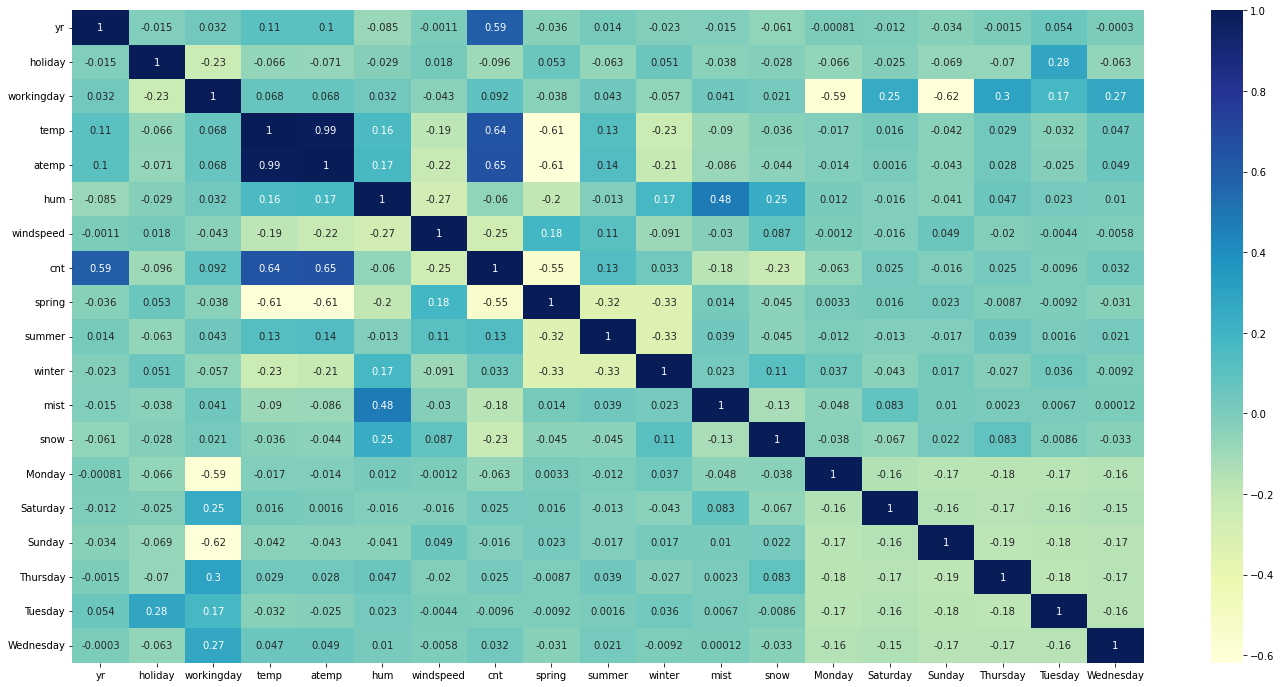

In [412]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24, 12))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

As you might have noticed, `atemp` seems to the correlated to `cnt` the most. Let's see a pairplot for `atemp` vs `cnt`.

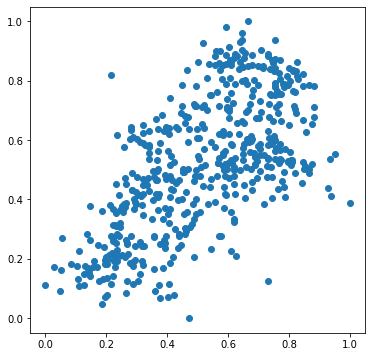

In [413]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

So, we pick `atemp` as the first variable and we'll try to fit a regression line to that.

### Dividing into X and Y sets for the model building

In [414]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 6: Building a linear model

In [415]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['atemp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [416]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.417
Method:                 Least Squares   F-statistic:                     364.7
Date:                Thu, 12 Oct 2023   Prob (F-statistic):           1.10e-61
Time:                        15:09:13   Log-Likelihood:                 176.51
No. Observations:                 510   AIC:                            -349.0
Df Residuals:                     508   BIC:                            -340.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1629      0.020      8.199      0.0

### Adding another variable

In [417]:
# Assign 2 vars
X_train_lm = X_train[['atemp', 'yr']]

In [418]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const    0.072104
atemp    0.625241
yr       0.237817
dtype: float64

In [419]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     579.5
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          1.07e-131
Time:                        15:09:21   Log-Likelihood:                 341.87
No. Observations:                 510   AIC:                            -677.7
Df Residuals:                     507   BIC:                            -665.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0721      0.015      4.810      0.0

We have clearly improved the model as the value of adjusted R-squared as its value has gone up.

In [420]:
# Assign all the feature variables to X
X_train_lm = X_train[['atemp', 'yr','spring']]

In [421]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const     0.194207
atemp     0.450626
yr        0.241153
spring   -0.140749
dtype: float64

In [422]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     482.6
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          5.58e-148
Time:                        15:09:27   Log-Likelihood:                 383.02
No. Observations:                 510   AIC:                            -758.0
Df Residuals:                     506   BIC:                            -741.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1942      0.019     10.238      0.0

We have improved the adjusted R-squared again. Now let's go ahead and add all the feature variables.

### Adding all the variables to the model

In [479]:
# Check all the columns of the dataframe
X_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'spring', 'summer', 'winter', 'mist', 'snow', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [424]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.208589
yr            0.231777
holiday      -0.000750
workingday    0.083562
temp          0.440046
atemp         0.056062
hum          -0.124995
windspeed    -0.178022
spring       -0.075460
summer        0.041676
winter        0.088871
mist         -0.058571
snow         -0.250681
Monday        0.034595
Saturday      0.008577
Sunday        0.091182
Thursday      0.005371
Tuesday      -0.013940
Wednesday    -0.010743
dtype: float64

In [425]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     145.5
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          2.06e-179
Time:                        15:09:46   Log-Likelihood:                 496.63
No. Observations:                 510   AIC:                            -957.3
Df Residuals:                     492   BIC:                            -881.0
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2086      0.029      7.233      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

### Checking VIF

In [426]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [427]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3         temp  58.63
4        atemp  54.10
2   workingday  52.67
14      Sunday  11.95
12      Monday  11.55
7       spring   4.62
9       winter   3.22
1      holiday   3.07
8       summer   2.14
5          hum   1.89
16     Tuesday   1.88
15    Thursday   1.86
13    Saturday   1.74
17   Wednesday   1.74
10        mist   1.59
11        snow   1.26
6    windspeed   1.24
0           yr   1.04

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable atemp and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `atemp` as it has a very high p-value.

In [428]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop('atemp', axis=1)


In [429]:
# Build the fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [430]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     154.9
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          1.76e-180
Time:                        15:12:34   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     493   BIC:                            -887.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2083      0.029      7.232      0.0

In [432]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2   workingday  52.66
13      Sunday  11.94
11      Monday  11.55
6       spring   4.55
3         temp   3.51
8       winter   3.11
1      holiday   3.06
7       summer   2.07
4          hum   1.89
15     Tuesday   1.88
14    Thursday   1.86
16   Wednesday   1.74
12    Saturday   1.73
9         mist   1.58
10        snow   1.26
5    windspeed   1.20
0           yr   1.04

We could have:
- High P value, High VIF: Drop 
- High P value, Low VIF: First Remove this
- Low P value, High VIF: Then Remove this
- Low P value, Low VIF: Keep

### Dropping the Variable and Updating the Model

Lets drop High P Value and Low VIF: `holiday`

In [433]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('holiday', axis=1)

In [434]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [435]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     154.9
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          1.76e-180
Time:                        15:24:26   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     493   BIC:                            -887.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2071      0.045      4.591      0.0

In [436]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  32.10
1   workingday  19.47
2         temp  18.36
12      Sunday   5.50
10      Monday   5.33
4    windspeed   4.95
5       spring   4.55
7       winter   3.43
6       summer   2.47
8         mist   2.32
13    Thursday   2.18
0           yr   2.10
14     Tuesday   2.07
15   Wednesday   1.98
11    Saturday   1.93
9         snow   1.26

### Dropping the Variable and Updating the Model

Lets drop High P Value and Low VIF: `Thursday`

In [437]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Thursday', axis=1)

In [438]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [439]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     165.5
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          1.42e-181
Time:                        15:25:57   Log-Likelihood:                 496.49
No. Observations:                 510   AIC:                            -961.0
Df Residuals:                     494   BIC:                            -893.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2090      0.045      4.670      0.0

In [440]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  31.86
1   workingday  19.04
2         temp  18.20
12      Sunday   5.28
10      Monday   5.12
4    windspeed   4.94
5       spring   4.50
7       winter   3.41
6       summer   2.45
8         mist   2.32
0           yr   2.10
13     Tuesday   1.53
14   Wednesday   1.45
11    Saturday   1.44
9         snow   1.26

### Dropping the Variable and Updating the Model

Lets drop High P Value and Low VIF: `Saturday`

In [441]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Saturday', axis=1)

In [442]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [443]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     177.6
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          1.12e-182
Time:                        15:26:52   Log-Likelihood:                 496.42
No. Observations:                 510   AIC:                            -962.8
Df Residuals:                     495   BIC:                            -899.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2109      0.044      4.750      0.0

In [445]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3          hum  31.85
1   workingday  18.91
2         temp  18.12
11      Sunday   5.23
10      Monday   5.08
4    windspeed   4.94
5       spring   4.48
7       winter   3.40
6       summer   2.45
8         mist   2.32
0           yr   2.10
12     Tuesday   1.40
13   Wednesday   1.32
9         snow   1.25

### Dropping the Variable and Updating the Model

Lets drop Low P Value and High VIF: `hum`

In [446]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', axis=1)

In [447]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [449]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     187.0
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          1.32e-181
Time:                        15:28:22   Log-Likelihood:                 491.14
No. Observations:                 510   AIC:                            -954.3
Df Residuals:                     496   BIC:                            -895.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1483      0.040      3.682      0.0

In [450]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
1   workingday  16.36
2         temp  12.29
3    windspeed   4.77
10      Sunday   4.64
9       Monday   4.39
4       spring   3.69
6       winter   2.63
5       summer   2.25
0           yr   2.08
7         mist   1.56
11     Tuesday   1.36
12   Wednesday   1.32
8         snow   1.09

### Dropping the Variable and Updating the Model

Lets drop High P Value and Low VIF: `Monday`

In [451]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('Monday', axis=1)

In [456]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_final = sm.OLS(y_train, X_train_lm).fit()

In [457]:
# Print the summary of the model

print(lr_final.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     202.5
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          1.46e-182
Time:                        15:34:24   Log-Likelihood:                 490.65
No. Observations:                 510   AIC:                            -955.3
Df Residuals:                     497   BIC:                            -900.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1737      0.031      5.630      0.0

In [458]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2         temp  5.28
1   workingday  4.99
3    windspeed  4.64
4       spring  2.25
0           yr  2.08
5       summer  1.87
9       Sunday  1.84
6       winter  1.76
7         mist  1.55
11   Wednesday  1.31
10     Tuesday  1.29
8         snow  1.08

#### Now, we have arrived at our finalised list of  independent variables using Manual var selection.
Here are the vars we have dropped sequentially:
- atemp
- holiday
- Thursday
- Saturday
- hum
- Monday

### Variable Selection Using RFE

In [480]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [486]:
# Confirm X_train still contains all the cols
X_train.head(3)

yr  holiday  workingday      temp     atemp       hum  windspeed  spring  \
653   1        0           1  0.509887  0.501133  0.575354   0.300794       0   
576   1        0           1  0.815169  0.766351  0.725633   0.264686       0   
426   1        0           0  0.442393  0.438975  0.640189   0.255342       1   

     summer  winter  mist  snow  Monday  Saturday  Sunday  Thursday  Tuesday  \
653       0       1     0     0       0         0       0         0        0   
576       0       0     0     0       0         0       0         0        0   
426       0       0     1     0       0         0       1         0        0   

     Wednesday  
653          1  
576          1  
426          0

In [499]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,n_features_to_select= 12)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [500]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mist', True, 1),
 ('snow', True, 1),
 ('Monday', False, 3),
 ('Saturday', False, 6),
 ('Sunday', True, 1),
 ('Thursday', False, 7),
 ('Tuesday', False, 4),
 ('Wednesday', False, 5)]

In [501]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'mist', 'snow', 'Sunday'],
      dtype='object')

In [502]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Monday', 'Saturday', 'Thursday', 'Tuesday', 'Wednesday'], dtype='object')

### Obseravtion: It looks like RFE algorithm has given us a better list of independent vars, so we will now train our final model using RFE

In [503]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [504]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [506]:
lm_rfe = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [508]:
#Let's see the summary of our linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     206.7
Date:                Thu, 12 Oct 2023   Prob (F-statistic):          2.13e-184
Time:                        16:18:41   Log-Likelihood:                 495.00
No. Observations:                 510   AIC:                            -964.0
Df Residuals:                     497   BIC:                            -909.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2445      0.037      6.631      0.0

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [510]:
y_train_cnt = lm_rfe.predict(X_train_lm)

/var/folders/sb/lnxyt0111qj87ztj620kkkdm0000gn/T/ipykernel_21657/2756863869.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_cnt), bins = 20)


Text(0.5, 0, 'Errors')

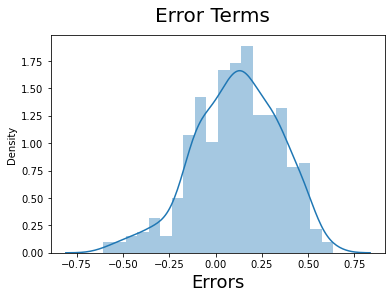

In [512]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [462]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [463]:
df_test.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.479452    0.036530    0.698630    0.558941    0.532991    0.638508   
std      0.500722    0.188034    0.459904    0.233698    0.217888    0.148974   
min      0.000000    0.000000    0.000000    0.046591    0.025950    0.261915   
25%      0.000000    0.000000    0.000000    0.354650    0.344751    0.527265   
50%      0.000000    0.000000    1.000000    0.558691    0.549198    0.627737   
75%      1.000000    0.000000    1.000000    0.759096    0.714132    0.743928   
max      1.000000    1.000000    1.000000    0.984424    0.980934    1.002146   

        windspeed         cnt      spring      summer      winter        mist  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.313350    0.520592    0.255708    0.264840    0.232877    0.319635   
std      0.159947    0.218435    0.437258    0.442259    0.423633    0.467403   
min     -0.042808    0.048205    0.000000    0.000000    0.000000    0.000000   
25%      0.198517    0.377531    0.000000    0.000000    0.000000    0.000000   
50%      0.299459    0.524275    0.000000    0.000000    0.000000    0.000000   
75%      0.403048    0.672745    1.000000    1.000000    0.000000    1.000000   
max      0.807474    0.963300    1.000000    1.000000    1.000000    1.000000   

             snow      Monday    Saturday      Sunday    Thursday     Tuesday  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.027397    0.146119    0.178082    0.118721    0.100457    0.127854   
std      0.163612    0.354034    0.383458    0.324202    0.301297    0.334692   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Wednesday  
count  219.000000  
mean     0.164384  
std      0.371472  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000

#### Dividing into X_test and y_test

In [518]:
y_test = df_test.pop('cnt')
X_test = df_test

In [520]:
X_test = X_test[col]

In [521]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [522]:
X_test_m4.head()

const  yr  holiday  workingday      temp       hum  windspeed  spring  \
184    1.0   0        1           0  0.831783  0.657364   0.084219       0   
535    1.0   1        0           1  0.901354  0.610133   0.153728       0   
299    1.0   0        0           1  0.511964  0.837699   0.334206       0   
221    1.0   0        0           1  0.881625  0.437098   0.339570       0   
152    1.0   0        0           1  0.817246  0.314298   0.537414       0   

     summer  winter  mist  snow  Sunday  
184       0       0     1     0       0  
535       1       0     0     0       0  
299       0       1     1     0       0  
221       0       0     0     0       0  
152       1       0     0     0       0

In [523]:
# Making predictions using the fourth model

y_pred_m4 = lm_rfe.predict(X_test_m4)

## Step 9: Model Evaluation and Test Data R2 Score

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

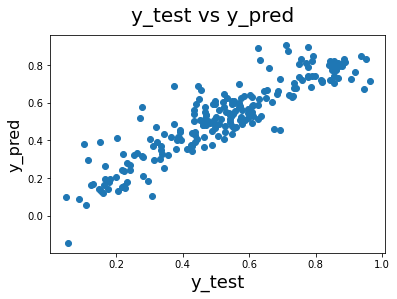

In [524]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      


We can see that the equation of our best fitted line can be calculated using the co-efficients:


In [562]:
lm_rfe.params

const         0.244485
yr            0.231039
holiday      -0.045827
workingday    0.046859
temp          0.494867
hum          -0.127590
windspeed    -0.181197
spring       -0.073713
summer        0.042583
winter        0.089872
mist         -0.057672
snow         -0.249469
Sunday        0.056382
dtype: float64

In [526]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_m4)

0.806923507926608

Hence, to conculed, we can observe that R2 from training set was approx `0.833` while for test set its comparable at `0.806`